
**Deep Convolutional Neural Networks for Accurate detection of Coronavirus through chest CT screening**



In [1]:
from google.colab import drive
drive.mount('/content/drive')       #Mounting drive to load images from drive

Mounted at /content/drive


**Here we have uploaded sample open lung images**

In [ ]:
!ls "/content/drive/MyDrive/open"
baseloc = "/content/drive/MyDrive/COVID tif images/open/"

v10.tif  v13.tif  v16.tif  v20.tif  v23.tif  v26.tif  v29.tif  v8.tif
v11.tif  v14.tif  v17.tif  v21.tif  v24.tif  v27.tif  v6.tif   v9.tif
v12.tif  v15.tif  v19.tif  v22.tif  v25.tif  v28.tif  v7.tif


In [ ]:
!ls "/content/drive/MyDrive/COVID tif images/open"

'cropped v20.tif'   v12.tif   v16.tif   v21.png   v24.tif   v28.tif   v8.tif
'cropped v6.tif'    v13.tif   v17.tif   v21.tif   v25.tif   v29.tif   v9.tif
 v10.tif	    v14.tif   v19.tif   v22.tif   v26.tif   v6.tif
 v11.tif	    v15.tif   v20.tif   v23.tif   v27.tif   v7.tif


**Let's import the essential libraries**

In [ ]:
import cv2
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from google.colab.patches import cv2_imshow

**To load a open lung image and do some pre-processing**

---



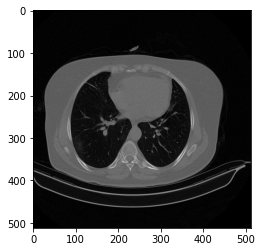

In [ ]:
imgloc  = baseloc+'/'+'v21.tif'                     #Location
img = Image.open(imgloc)                            #Loading the image
img = np.array(img)                                 #Converting the image into numpy
plt.imshow(img , 'gray')                            #Show the image as gray
plt.imsave(str(imgloc)[:-4]+'.png',img,cmap=cm.gray)#converted from 2d to 3d

**To load a open lung image and do some pre-processing**

---



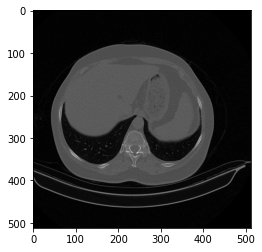

In [ ]:
baseloc2 = "/content/drive/MyDrive/COVID tif images/closed/"
imgloc  = baseloc2+'/'+'v31.tif'                     #Location

img = Image.open(imgloc)                            #Loading the image
img = np.array(img)                                 #Converting the image into numpy
plt.imshow(img , 'gray')                            #Show the image as gray
plt.imsave(str(imgloc)[:-4]+'.png',img,cmap=cm.gray)#converted from 2d to 3d

#Cropping Function

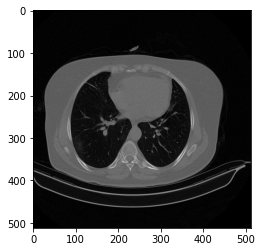

In [ ]:
imgloc  = baseloc+'/'+'v21.tif'                     #Location
img = Image.open(imgloc)                            #Loading the image
img = np.array(img)                                 #Converting the image into numpy
plt.imshow(img , 'gray')                            #Show the image as gray
plt.imsave(str(imgloc)[:-4]+'.png',img,cmap=cm.gray)#converted from 2d to 3d

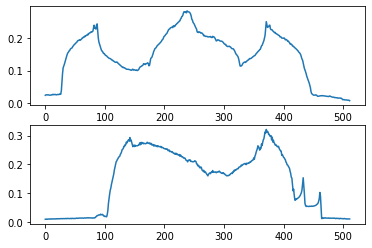

In [ ]:
cols = img.mean(axis=0)    #since images are converted into numpy arrays thus can be used to calculate mean axis wise 
rows = img.mean(axis=1)    # Avg is calculated linewise (axis wise)
f, ax = plt.subplots(2, 1) # plot histograms of mean pixels
ax[0].plot(cols)
ax[1].plot(rows)
f.show()                    # X axis in each graph shows the location(in terms of pixel) at which the average value is plotted
                            # Avg value is the intensity of the pixel
                            # 

In [ ]:
a,b                    = list(cols), list(rows)                                 #All values of the histogram are collected in separate list
a1,a2,a3               = max(a[:h//3]),max(a[h//3:2*h//3]),max(a[2*h//3:])      #Maxima is spotted in a range of initial and final 33% percent length(Vertically) of the image 
b1,b2,b3               = max(b[:w//3]),max(b[w//3:2*w//3]),max(b[2*w//3:])      #Maxima is spotted in a range of initial and final 33% percent length(Horizontally) of the image
colsvalue,rowsvalue    = (a.index(a1),a.index(a2),a.index(a3)),(b.index(b1),b.index(b2),b.index(b3)) # Location is traced( in terms of pixel) for each maxima which is crucial to start and end the cropping

print(a1,a2,a3)
print(a.index(a1),a.index(a2),a.index(a3))
print(b1,b2,b3)
print(b.index(b1),b.index(b2),b.index(b3))

0.21458408 0.21584418 0.21311201
126 337 367
0.22285664 0.31992117 0.36004412
168 340 345


**Cropping Function**

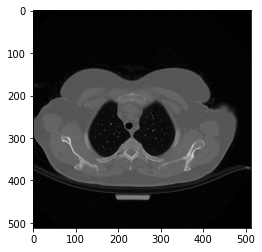

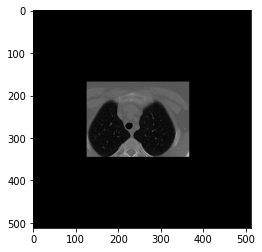

In [ ]:
from PIL import Image 
import os

for i in os.listdir(baseloc+"/"):
    if i[-3:] == "tif" :                            #If last three strings are tif
        img = Image.open(baseloc+"/"+str(i))        
        img = np.array(img)
        h,w = img.shape
        cols,rows              = img.mean(axis=0),img.mean(axis=1)
        a,b                    = list(cols), list(rows)   # here we a collect all values of the histogram in separate list
        a1,a2,a3               = max(a[:h//3]),max(a[h//3:2*h//3]),max(a[2*h//3:])  #Maxima is spotted in a range of initial and 
                                                                                    #final 33% percent length(Vertically) of the image 
        b1,b2,b3               = max(b[:w//3]),max(b[w//3:2*w//3]),max(b[2*w//3:])   #Maxima is spotted in a range of initial and 
                                                                                      #final 33% percent length(Horizontally) of the image
        colsvalue,rowsvalue    = (a.index(a1),a.index(a2),a.index(a3)),(b.index(b1),b.index(b2),b.index(b3)) # Location is traced( in terms of pixel)
                                                                                               # for each maxima which is crucial to start and end the cropping
        mask = np.zeros(img.shape, np.uint8)
        mask[rowsvalue[0]:rowsvalue[2],colsvalue[0]:colsvalue[2]] = 255
        masked_img = cv2.bitwise_and(img,img,mask = mask)

        plt.plot(221), plt.imshow(img, 'gray')
        plt.show()

        #saving
        img2 = Image.fromarray(masked_img)
        savedas = baseloc+"cropped "+str(i)
        img2.save(savedas)
        img2 = Image.open(savedas)
        img2 = np.array(img2)
        plt.plot(211), plt.imshow(img2, 'gray')
        plt.show() 
    break